In [6]:
import os
import nltk
import pandas as pd
from googleapiclient.discovery import build
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize NLTK
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# --- YouTube API Functions (NO CHANGES) ---
def fetch_youtube_comments(video_id, api_key, max_comments=1000):
    youtube = build('youtube', 'v3', developerKey=api_key)
    comments = []
    next_page_token = None

    while len(comments) < max_comments:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            pageToken=next_page_token
        )
        response = request.execute()
        for item in response.get('items', []):
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    return comments[:max_comments]

# --- VADER Sentiment (NO CHANGES) ---
def analyze_vader_sentiment(comment):
    scores = sid.polarity_scores(comment)
    if scores['compound'] >= 0.5:
        return 'Very Positive'
    elif scores['compound'] >= 0.1:
        return 'Positive'
    elif scores['compound'] <= -0.5:
        return 'Very Negative'
    elif scores['compound'] <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# --- Optimized Hugging Face (CPU-Only) ---
def analyze_huggingface_sentiment(comment, pipe):
    result = pipe(comment, truncation=True, max_length=512)[0]
    return result['label']

# --- Main Function ---
def main():
    # YouTube API Setup
    api_key = "AIzaSyBaKUHL663Z5u0KBTPC7Njn8LZA2|S7U64@"  
    video_id = "LqoaAP5h67Y"               #https://youtu.be/LqoaAP5h67Y?si=O4m5Dkb1WFIUoIQV
                                            #XAYXDQ

    # Initialize Hugging Face model (CPU-only)
    print("Loading Hugging Face model (CPU-only)...")
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    pipe = pipeline(
        "text-classification",
        model=model,
        tokenizer=tokenizer,
        #device=-1  # Force CPU
    )

    # Fetch and analyze comments
    print("Fetching comments...")
    comments = fetch_youtube_comments(video_id, api_key)

    print("Running sentiment analysis...")
    results = []
    for i, comment in enumerate(comments[::]):  # Analyze first 50 for testing
        vader = analyze_vader_sentiment(comment)
        hf = analyze_huggingface_sentiment(comment, pipe)
        results.append({
            'Comment': comment,
            'VADER': vader,
            'HuggingFace': hf
        })
        print(f"Processed {i+1}/{len(comments)}")

    # Save results
    df = pd.DataFrame(results)
    df.to_csv("sentiment_results.csv", index=False)
    print("new_result.csv")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package vader_lexicon to C:\Users\PRIYA\AppDat
[nltk_data]     a\Local\Programs\Python\Python310\lib\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Loading Hugging Face model (CPU-only)...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Fetching comments...
Running sentiment analysis...
Processed 1/728
Processed 2/728
Processed 3/728
Processed 4/728
Processed 5/728
Processed 6/728
Processed 7/728
Processed 8/728
Processed 9/728
Processed 10/728
Processed 11/728
Processed 12/728
Processed 13/728
Processed 14/728
Processed 15/728
Processed 16/728
Processed 17/728
Processed 18/728
Processed 19/728
Processed 20/728
Processed 21/728
Processed 22/728
Processed 23/728
Processed 24/728
Processed 25/728
Processed 26/728
Processed 27/728
Processed 28/728
Processed 29/728
Processed 30/728
Processed 31/728
Processed 32/728
Processed 33/728
Processed 34/728
Processed 35/728
Processed 36/728
Processed 37/728
Processed 38/728
Processed 39/728
Processed 40/728
Processed 41/728
Processed 42/728
Processed 43/728
Processed 44/728
Processed 45/728
Processed 46/728
Processed 47/728
Processed 48/728
Processed 49/728
Processed 50/728
Processed 51/728
Processed 52/728
Processed 53/728
Processed 54/728
Processed 55/728
Processed 56/728
Proces

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_1972\3670156972.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts[vader_order].index,
C:\Users\PRIYA\AppData\Local\Temp\ipykernel_1972\3670156972.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hf_counts[hf_order].index,


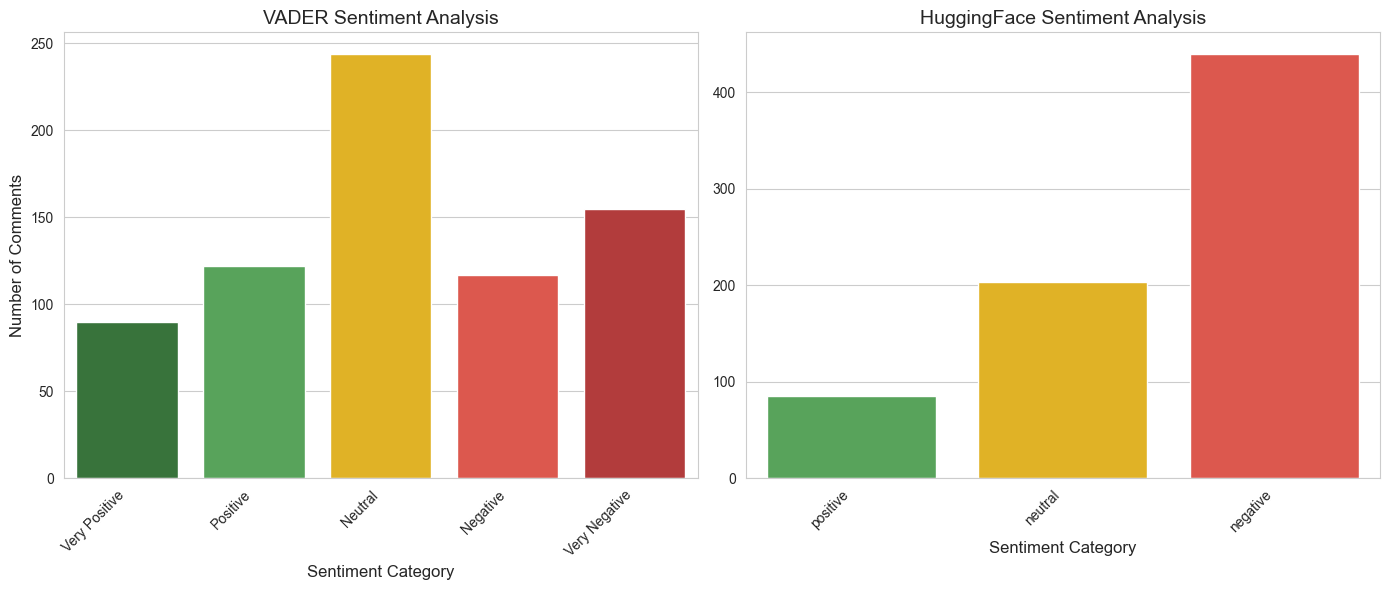

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("sentiment_results.csv")

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- VADER Sentiment ---
plt.subplot(1, 2, 1)
vader_counts = df['VADER'].value_counts()
vader_order = ['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']
sns.barplot(x=vader_counts[vader_order].index, 
            y=vader_counts[vader_order].values,
            palette=['#2E7D32', '#4CAF50', '#FFC107', '#F44336', '#C62828'])
plt.title("VADER Sentiment Analysis", fontsize=14)
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(rotation=45, ha='right')

# --- HuggingFace Sentiment ---
plt.subplot(1, 2, 2)
hf_counts = df['HuggingFace'].value_counts()
hf_order = ['positive', 'neutral', 'negative']
sns.barplot(x=hf_counts[hf_order].index, 
            y=hf_counts[hf_order].values,
            palette=['#4CAF50', '#FFC107', '#F44336'])
plt.title("HuggingFace Sentiment Analysis", fontsize=14)
plt.xlabel("Sentiment Category", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()